<a href="https://colab.research.google.com/github/anniiisshaa/Traffic-Accident-Analysis/blob/main/Traffic_Accident_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("readr")
install.packages("plotrix")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)
library(readr)
library(plotrix)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
file_path <- "/content/traffic_accidents.csv"
traffic_data <- read_csv(file_path)

Rows: 209306 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): crash_date, traffic_control_device, weather_condition, lighting_co...
dbl (10): num_units, injuries_total, injuries_fatal, injuries_incapacitating...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(traffic_data)


crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,⋯,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,⋯,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,⋯,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,⋯,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,⋯,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,⋯,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8
09/06/2023 12:59:00 AM,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,⋯,NONINCAPACITATING INJURY,2,0,0,2,0,0,0,4,9


In [ ]:
str(traffic_data)

spc_tbl_ [209,306 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ crash_date                   : chr [1:209306] "07/29/2023 01:00:00 PM" "08/13/2023 12:11:00 AM" "12/09/2021 10:30:00 AM" "08/09/2023 07:55:00 PM" ...
 $ traffic_control_device       : chr [1:209306] "TRAFFIC SIGNAL" "TRAFFIC SIGNAL" "TRAFFIC SIGNAL" "TRAFFIC SIGNAL" ...
 $ weather_condition            : chr [1:209306] "CLEAR" "CLEAR" "CLEAR" "CLEAR" ...
 $ lighting_condition           : chr [1:209306] "DAYLIGHT" "DARKNESS, LIGHTED ROAD" "DAYLIGHT" "DAYLIGHT" ...
 $ first_crash_type             : chr [1:209306] "TURNING" "TURNING" "REAR END" "ANGLE" ...
 $ trafficway_type              : chr [1:209306] "NOT DIVIDED" "FOUR WAY" "T-INTERSECTION" "FOUR WAY" ...
 $ alignment                    : chr [1:209306] "STRAIGHT AND LEVEL" "STRAIGHT AND LEVEL" "STRAIGHT AND LEVEL" "STRAIGHT AND LEVEL" ...
 $ roadway_surface_cond         : chr [1:209306] "UNKNOWN" "DRY" "DRY" "DRY" ...
 $ road_defect                  : chr [1:209306] "

In [ ]:

colSums(is.na(traffic_data))

crash_date        traffic_control_device 
                            0                             0 
            weather_condition            lighting_condition 
                            0                             0 
             first_crash_type               trafficway_type 
                            0                             0 
                    alignment          roadway_surface_cond 
                            0                             0 
                  road_defect                    crash_type 
                            0                             0 
       intersection_related_i                        damage 
                            0                             0 
      prim_contributory_cause                     num_units 
                            0                             0 
           most_severe_injury                injuries_total 
                            0                             0 
               injuries_fatal       injuries_incapacitating 
                            0                             0 
  injuries_non_incapacitating injuries_reported_not_evident 
                            0                             0 
       injuries_no_indication                    crash_hour 
                            0                             0 
            crash_day_of_week                   crash_month 
                            0                             0

In [ ]:
summary(traffic_data)

  crash_date        traffic_control_device weather_condition 
 Length:209306      Length:209306          Length:209306     
 Class :character   Class :character       Class :character  
 Mode  :character   Mode  :character       Mode  :character  
                                                             
                                                             
                                                             
 lighting_condition first_crash_type   trafficway_type     alignment        
 Length:209306      Length:209306      Length:209306      Length:209306     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 roadway_surface_cond road_

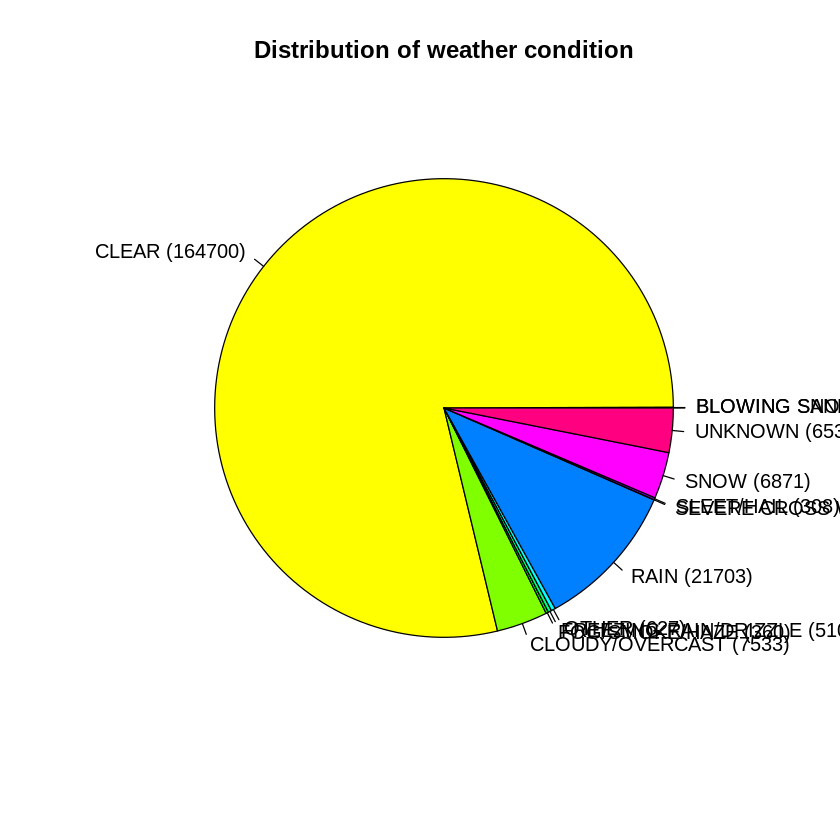

In [ ]:
# Check if the "weather_condition" column exists
if ("weather_condition" %in% names(traffic_data)){
  # Count occurrences for each weather_condition category
  weather_condition_counts <- traffic_data %>%
    group_by(weather_condition) %>%
    summarise(count = n())

  # Create a pie chart
  pie(weather_condition_counts$count,
      labels = paste0(weather_condition_counts$weather_condition, " (", weather_condition_counts$count, ")"),
      col = rainbow(length(weather_condition_counts$weather_condition)),
      main = "Distribution of weather condition")
} else {
  cat("The 'weather_condition' column does not exist in the dataset.\n")
}

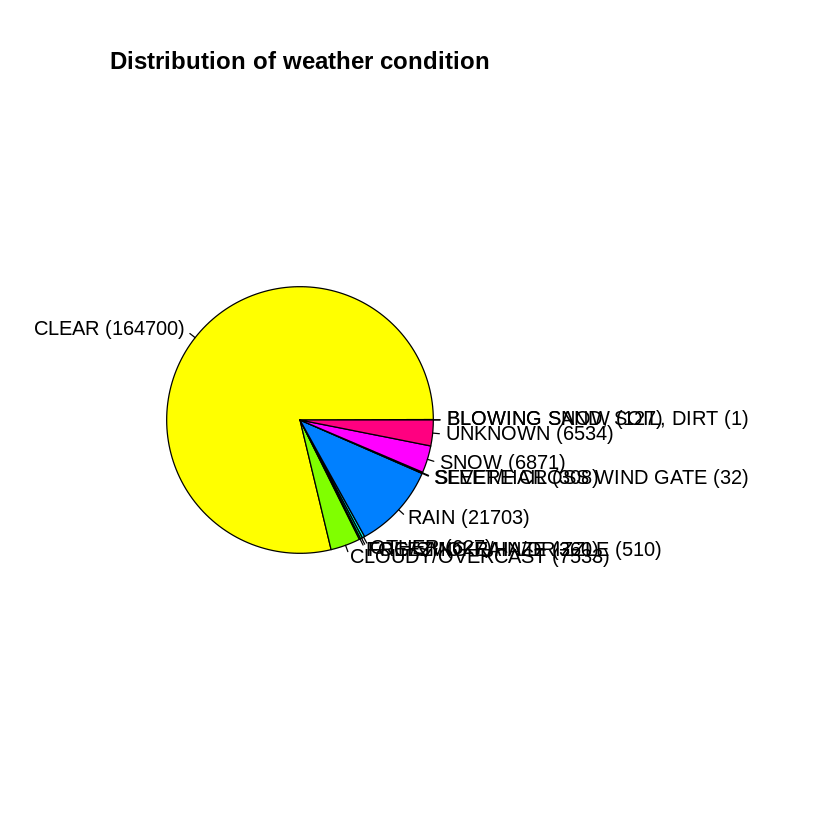

In [ ]:
# Increase the size of the plot
par(mai = c(1, 1, 1, 3))  # Adjust plot margins (bottom, left, top, right)
pie(weather_condition_counts$count,
    labels = paste0(weather_condition_counts$weather_condition, " (", weather_condition_counts$count, ")"),
    col = rainbow(length(weather_condition_counts$weather_condition)),
    main = "Distribution of weather condition")

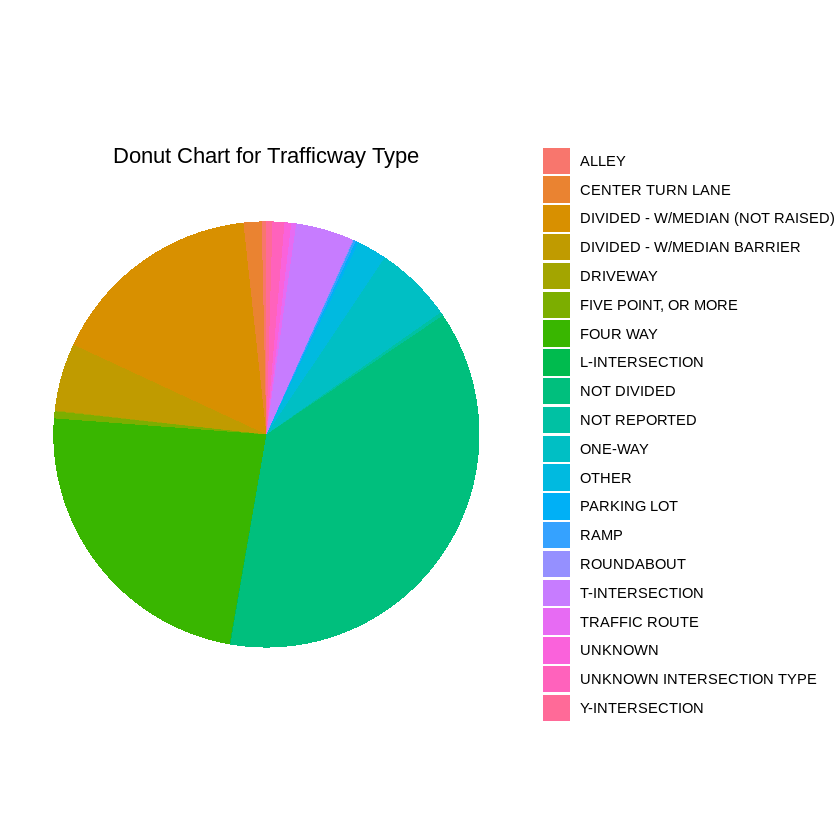

In [ ]:
#donut chart for trafficway type
traffic_data %>%
  count(trafficway_type) %>%
  ggplot(aes(x = "", y = n, fill = trafficway_type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_void() +
  theme(legend.title = element_blank()) +
  labs(title = "Donut Chart for Trafficway Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(legend.position = "right")

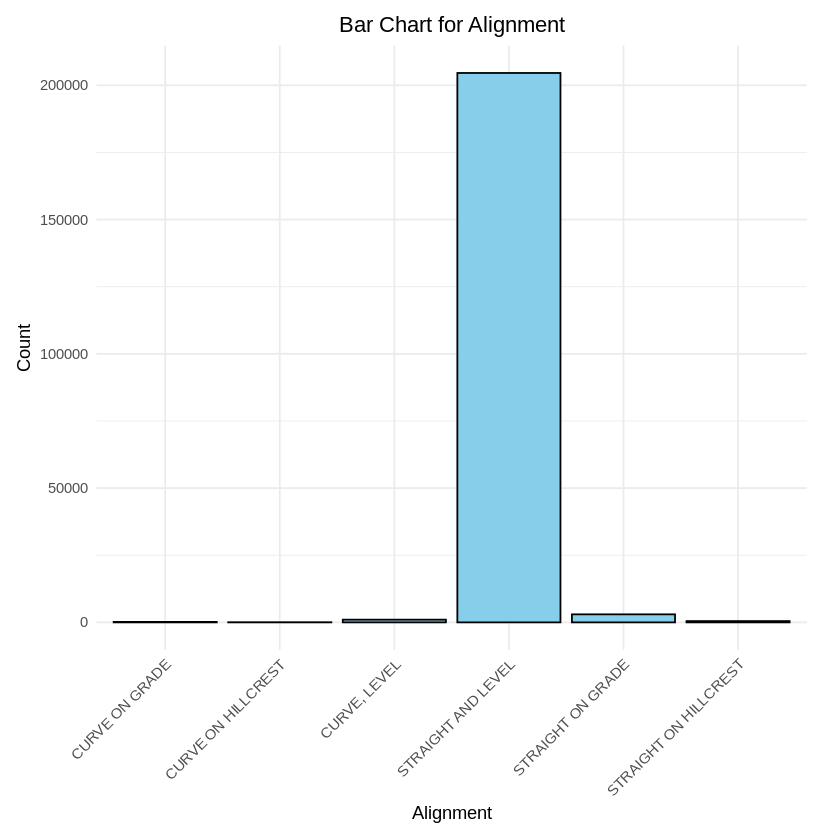

In [ ]:
# Create bar chart for 'alignment' column with adjustments
p <- ggplot(traffic_data, aes(x = alignment)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Bar Chart for Alignment", x = "Alignment", y = "Count") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels to avoid overlap
    plot.margin = margin(10, 20, 10, 10))

print(p)


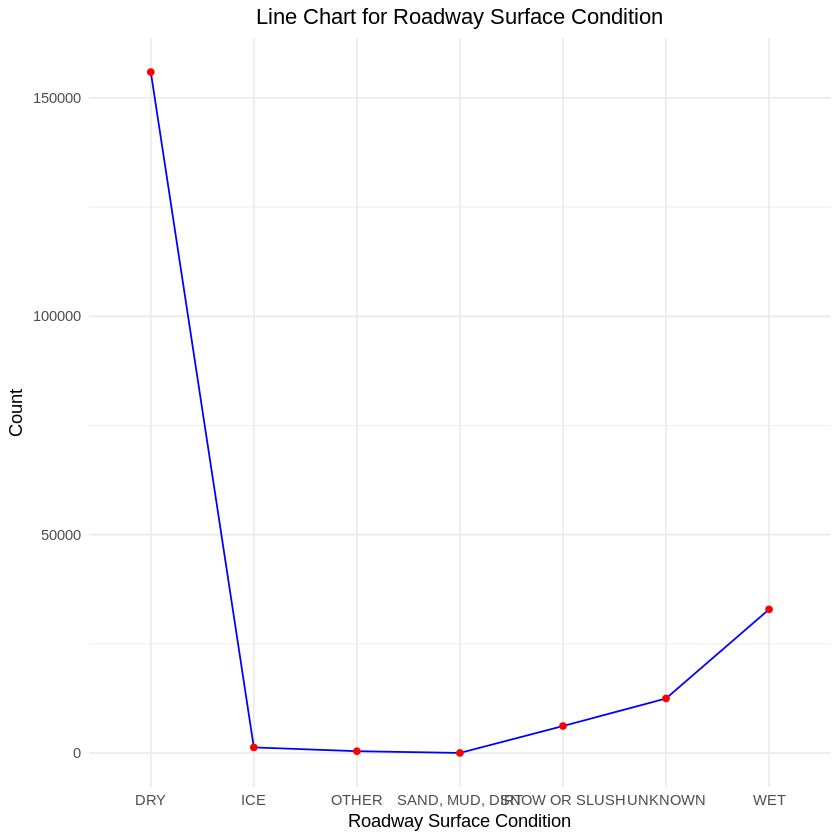

In [ ]:
# LINE CHART FOR roadway_surface_cond
summarized_data <- traffic_data %>%
  count(roadway_surface_cond) %>%
  arrange(roadway_surface_cond)

# Create line chart
ggplot(summarized_data, aes(x = roadway_surface_cond, y = n, group = 1)) +
  geom_line(color = "blue") +
  geom_point(color = "red") +
  labs(title = "Line Chart for Roadway Surface Condition",
       x = "Roadway Surface Condition",
       y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

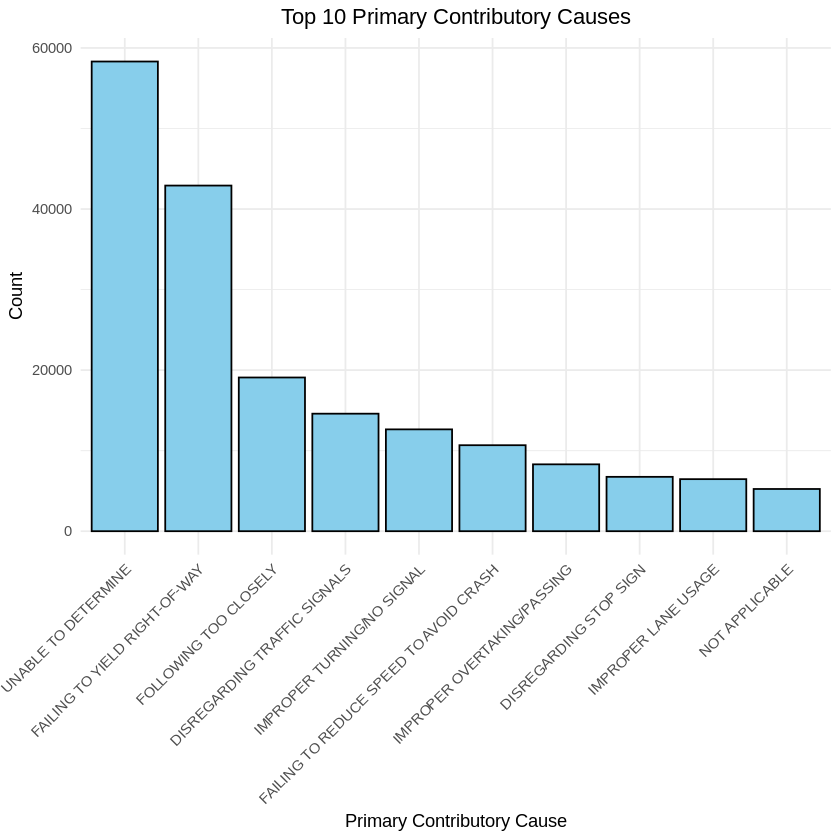

In [ ]:
top_10_data <- traffic_data %>%
  count(prim_contributory_cause) %>%
  arrange(desc(n)) %>%
  head(10)  # Keep only the top 10

# Create bar chart for the top 10 'prim_contributory_cause'
ggplot(top_10_data, aes(x = reorder(prim_contributory_cause, -n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Top 10 Primary Contributory Causes",
       x = "Primary Contributory Cause",
       y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),  # Center the plot title
        axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Correlation Heatmap for Categorical Data in R

In [ ]:
# Create a contingency table
contingency_table <- table(traffic_data$injury_type, traffic_data$trafficway_type)

Warning message:
“Unknown or uninitialised column: `injury_type`.”


ERROR: Error in table(traffic_data$injury_type, traffic_data$trafficway_type): all arguments must have the same length


In [ ]:
# Perform the Chi-Square test
chi_test <- chisq.test(contingency_table)

ERROR: Error: object 'contingency_table' not found


In [ ]:
# Convert observed values to a data frame for plotting
heatmap_data <- as.data.frame(as.table(contingency_table))


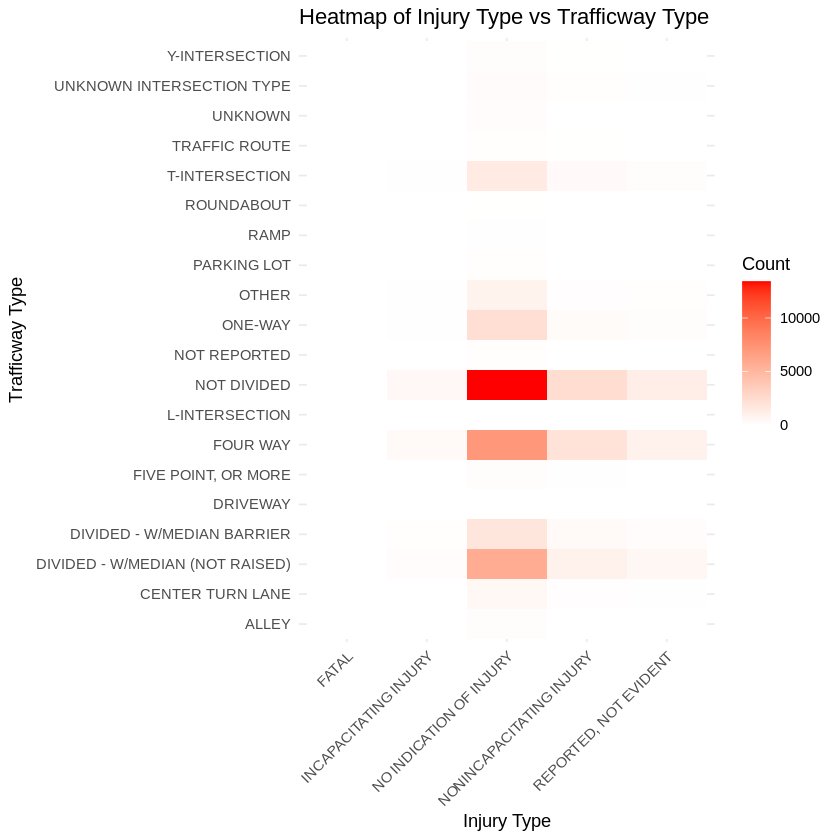

In [ ]:

# Plot the heatmap
ggplot(heatmap_data, aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "Heatmap of Injury Type vs Trafficway Type",
       x = "Injury Type", y = "Trafficway Type", fill = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## **REGRESSOR**

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘sparsevctrs’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(caret)

Loading required package: lattice



In [ ]:
str(traffic_data)

spc_tbl_ [209,306 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ crash_date                   : chr [1:209306] "07/29/2023 01:00:00 PM" "08/13/2023 12:11:00 AM" "12/09/2021 10:30:00 AM" "08/09/2023 07:55:00 PM" ...
 $ traffic_control_device       : chr [1:209306] "TRAFFIC SIGNAL" "TRAFFIC SIGNAL" "TRAFFIC SIGNAL" "TRAFFIC SIGNAL" ...
 $ weather_condition            : chr [1:209306] "CLEAR" "CLEAR" "CLEAR" "CLEAR" ...
 $ lighting_condition           : chr [1:209306] "DAYLIGHT" "DARKNESS, LIGHTED ROAD" "DAYLIGHT" "DAYLIGHT" ...
 $ first_crash_type             : chr [1:209306] "TURNING" "TURNING" "REAR END" "ANGLE" ...
 $ trafficway_type              : chr [1:209306] "NOT DIVIDED" "FOUR WAY" "T-INTERSECTION" "FOUR WAY" ...
 $ alignment                    : chr [1:209306] "STRAIGHT AND LEVEL" "STRAIGHT AND LEVEL" "STRAIGHT AND LEVEL" "STRAIGHT AND LEVEL" ...
 $ roadway_surface_cond         : chr [1:209306] "UNKNOWN" "DRY" "DRY" "DRY" ...
 $ road_defect                  : chr [1:209306] "

In [ ]:
#categorical variables to factors
traffic_data$intersection_related_i <- as.factor(traffic_data$intersection_related_i)
traffic_data$prim_contributory_cause <- as.factor(traffic_data$prim_contributory_cause)
traffic_data$most_severe_injury <- as.factor(traffic_data$most_severe_injury)

In [ ]:
set.seed(123)
trainIndex <- createDataPartition(traffic_data$injuries_incapacitating, p = 0.8, list = FALSE)
trainData <- traffic_data[trainIndex, ]
testData <- traffic_data[-trainIndex, ]

In [ ]:
model <- lm(injuries_incapacitating ~ intersection_related_i + prim_contributory_cause + most_severe_injury, data = trainData)

In [ ]:
summary(model)



Call:
lm(formula = injuries_incapacitating ~ intersection_related_i + 
    prim_contributory_cause + most_severe_injury, data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3477 -0.0005  0.0014  0.0015  5.7968 

Coefficients:
                                                                                                          Estimate
(Intercept)                                                                                              0.3094412
intersection_related_iY                                                                                  0.0008679
prim_contributory_causeBICYCLE ADVANCING LEGALLY ON RED LIGHT                                           -0.0431342
prim_contributory_causeCELL PHONE USE OTHER THAN TEXTING                                                 0.0056236
prim_contributory_causeDISREGARDING OTHER TRAFFIC SIGNS                                                  0.0078097
prim_contributory_causeDISREGARDING ROAD MARKINGS            

In [ ]:
predictions <- predict(model, newdata = testData)

In [ ]:
mse <- mean((testData$injuries_incapacitating - predictions)^2)
cat("Mean Squared Error:", mse)

Mean Squared Error: 0.009733687

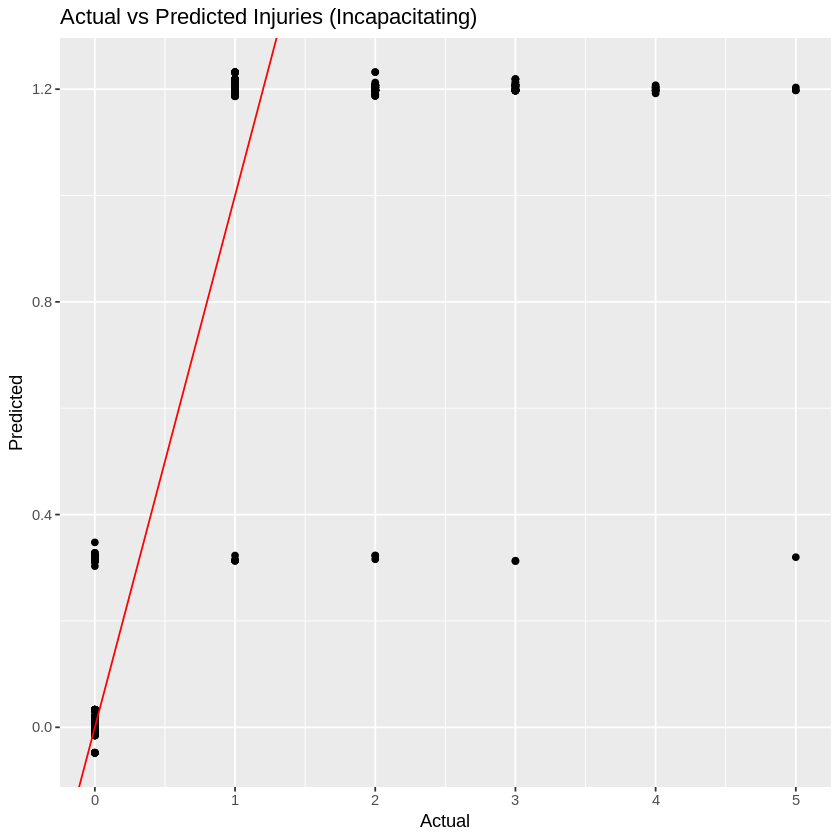

In [ ]:
ggplot(data = testData, aes(x = injuries_incapacitating, y = predictions)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Actual vs Predicted Injuries (Incapacitating)", x = "Actual", y = "Predicted")